# Data Loading

In [1]:
#importent libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data 
df_train = pd.read_csv("bigdatamart_Train.csv")
df_test = pd.read_csv("bigdatamart_Test.csv")

1. df_train = Data which is use for modal building
2. df_test = Data which is use for modal prediction

we have to concat both data for EDA prosess, so i create now column in each data set to know about that perticuler data is use for train and test.

In [3]:
df_train['Train_Test'] = 'Train'
df_test['Train_Test'] ='Test'

In [4]:
# Concat both data
df = pd.concat([df_train,df_test],ignore_index=True)
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Train_Test
14194,FDA01,15.00,reg,0.054463,Canned,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,Test
14195,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,Test
14196,FDF46,7.07,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14197,DRL35,15.70,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14198,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,Test
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test
14203,FDU37,9.50,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test


# Correlation 

1. Corr() method

In [5]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [6]:
df_corr_metric = df.corr()
df_corr_metric['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

2. Heatmap

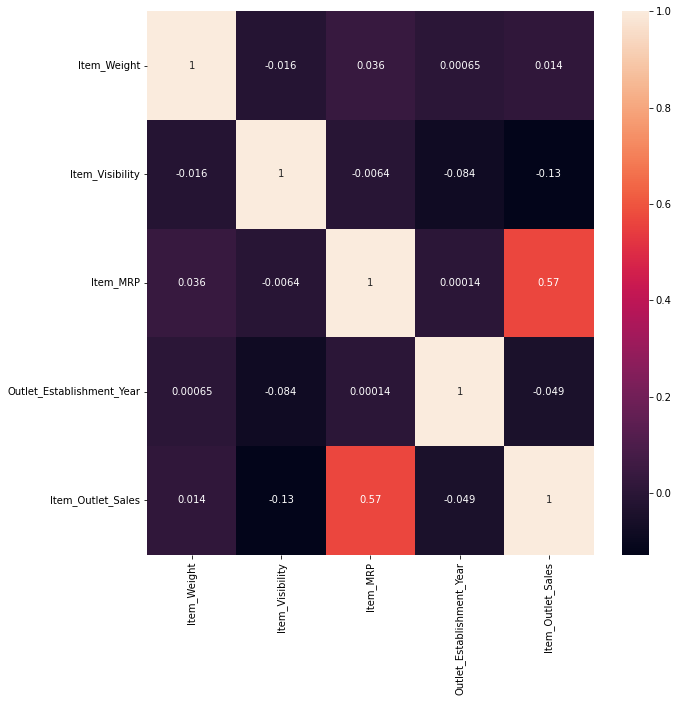

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr_metric,annot=True)
plt.show()

1. we clearly seeing that Item_MRP is corelated with target. that  is very importent feature.
2. Very low co- relation among features.

# Skewness

In [8]:
df.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
dtype: float64

1. Dataset has some objective data. so we cannot use z-score method.
2. we are using np.sqrt method for remove skewness.

In [9]:
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index] = np.sqrt(df[index])
df.skew()

Item_Weight                  0.101309
Item_Visibility             -0.096758
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            0.234676
dtype: float64

Skewness has been gone.

# Chacking data type

In [10]:
#data information
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.233456,141.004977,1997.830681,42.944777
std,4.652502,0.107013,62.086938,8.371664,18.359591
min,4.555000,0.000000,31.290000,1985.000000,5.769749
25%,8.710000,0.164425,94.012000,1987.000000,28.883339
50%,12.600000,0.232423,142.247000,1999.000000,42.359544
75%,16.750000,0.306655,185.855600,2004.000000,55.689284
max,21.350000,0.573054,266.888400,2009.000000,114.398273


In [11]:
#chacking null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Train_Test                      0
dtype: int64

In [12]:
#fill item weight with mean of data
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [13]:
df['Outlet_Size'].describe()

count      10188
unique         3
top       Medium
freq        4655
Name: Outlet_Size, dtype: object

In [14]:
#fill Outlet size with medium because Mode of this column is Medium
df['Outlet_Size'] = df['Outlet_Size'].fillna("Medium")

# As we know that target column also has null values 

1. Use Itrative Imputer Technic for fill na

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
it_impute = IterativeImputer()

In [16]:
new_df = it_impute.fit_transform(df[['Item_MRP','Item_Outlet_Sales']])

In [17]:
new_df = pd.DataFrame(new_df)
new_df.columns = ['Item_MRP','Item_Outlet_Sales']
new_df.head(10)

,Item_MRP,Item_Outlet_Sales
0,249.8092,61.115775
1,48.2692,21.057607
2,141.6180,45.795961
3,182.0950,27.062520
4,53.8614,31.538947
5,51.4008,23.592558
6,57.6588,18.535177
7,107.7622,63.425260
8,96.9726,32.811562
9,187.8214,68.633337


In [18]:
df[['Item_MRP','Item_Outlet_Sales']]=new_df[['Item_MRP','Item_Outlet_Sales']]

In [19]:
#Now data has no null values
print("Now Information of data is :",df.isna().sum())

Now Information of data is : Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Train_Test                   0
dtype: int64


In [20]:
#again chacking information about data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.233456,141.004977,1997.830681,42.946802
std,4.234226,0.107013,62.086938,8.371664,15.632787
min,4.555000,0.000000,31.290000,1985.000000,5.769749
25%,9.300000,0.164425,94.012000,1987.000000,32.248715
50%,12.792854,0.232423,142.247000,1999.000000,42.680544
75%,16.000000,0.306655,185.855600,2004.000000,52.828658
max,21.350000,0.573054,266.888400,2009.000000,114.398273


1. Now we can see that data is mix type so now deal with that

In [21]:
#Item_Identifier, outlet_identifier and outlet_year are not importent so drop it
df = df.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'])

1. first chack all objective data.
2. If any of them is not importent then drop that.

In [22]:
df.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Train_Test               object
dtype: object

In [23]:
#chacking all data
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [24]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("LF","low fat")
df['Item_Fat_Content'] =df['Item_Fat_Content'].replace("Low Fat","low fat")
df['Item_Fat_Content'] =df['Item_Fat_Content'].replace('reg','Regular')

In [25]:
df['Item_Fat_Content'].value_counts()

low fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

low fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


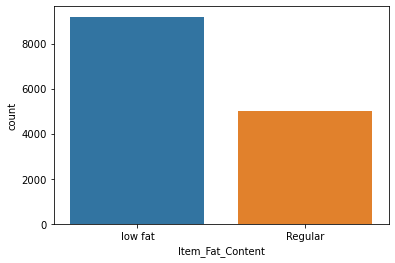

In [26]:
#chack value counts by using count plot
#Item_fat_content
ax = sns.countplot(x="Item_Fat_Content",data=df)
print(df['Item_Fat_Content'].value_counts())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


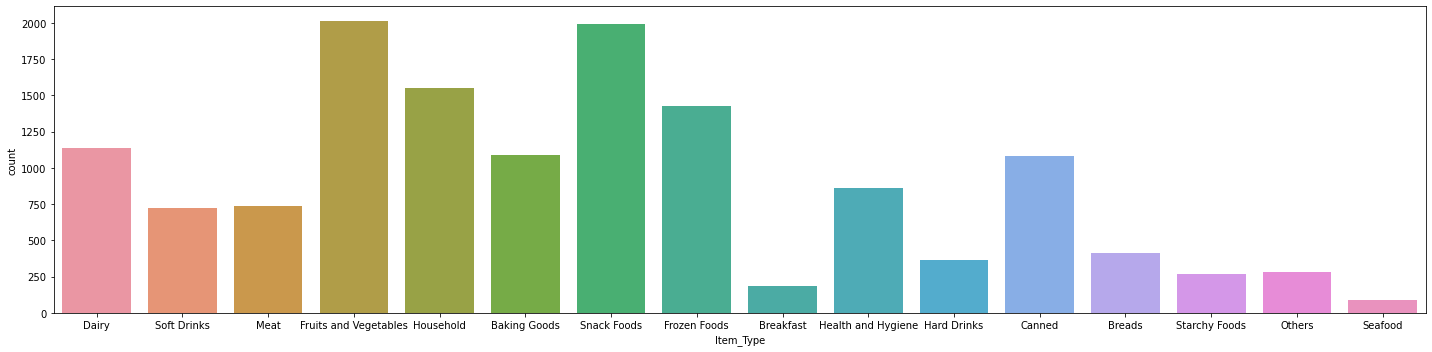

In [27]:
#Item type
plt.figure(figsize=(20,5),clear=True)
ax = sns.countplot(x="Item_Type",data=df)
print(df['Item_Type'].value_counts())
plt.tight_layout()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


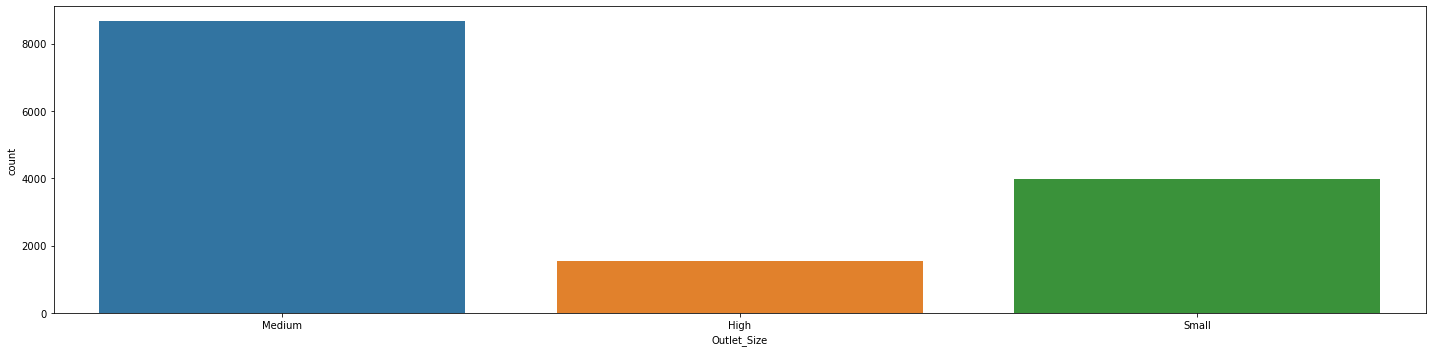

In [28]:
#Outlet size
plt.figure(figsize=(20,5),clear=True)
ax = sns.countplot(x="Outlet_Size",data=df)
print(df['Outlet_Size'].value_counts())
plt.tight_layout()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


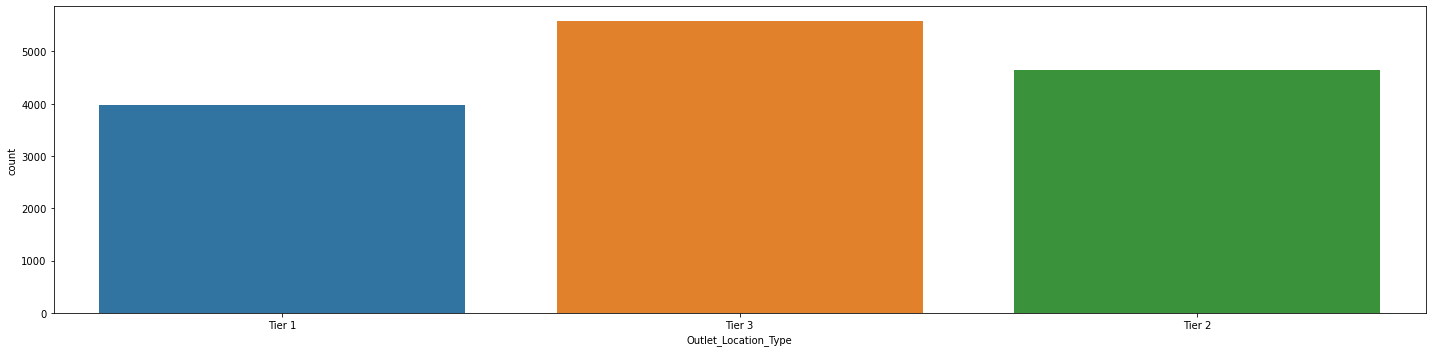

In [29]:
#Outlet location
plt.figure(figsize=(20,5),clear=True)
ax = sns.countplot(x="Outlet_Location_Type",data=df)
print(df['Outlet_Location_Type'].value_counts())
plt.tight_layout()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


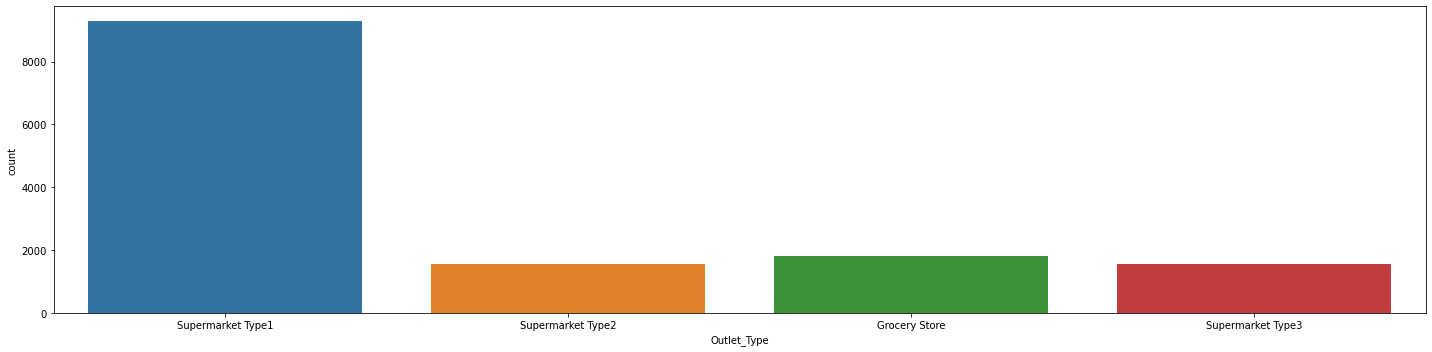

In [30]:
plt.figure(figsize=(20,5),clear=True)
ax = sns.countplot(x="Outlet_Type",data=df)
print(df['Outlet_Type'].value_counts())
plt.tight_layout()

# Saprate object data for converting into float 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           14204 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Size           14204 non-null  object 
 6   Outlet_Location_Type  14204 non-null  object 
 7   Outlet_Type           14204 non-null  object 
 8   Item_Outlet_Sales     14204 non-null  float64
 9   Train_Test            14204 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


In [32]:
df_objective = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
df = pd.get_dummies(data=df,columns=df_objective)
df.tail(10)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Train_Test,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
14194,15.00,0.233373,59.5904,29.426552,Test,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
14195,6.86,0.191296,231.1010,57.908752,Test,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
14196,7.07,0.306680,116.0834,38.808158,Test,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
14197,15.70,0.175225,43.2770,26.717439,Test,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
14198,13.00,0.265351,63.4484,30.067237,Test,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
14199,10.50,0.116174,141.3154,42.998353,Test,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
14200,7.60,0.378141,169.1448,47.619890,Test,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
14201,10.00,0.271162,118.7440,39.249995,Test,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
14202,15.30,0.000000,214.6218,55.172105,Test,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
14203,9.50,0.323605,79.7960,32.782029,Test,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


Saparate data in train and test

In [33]:
#train and test data split
df_train = df.loc[df['Train_Test']=='Train']
df_test = df.loc[df['Train_Test']=='Test']

In [34]:
print("The shape of train data is :", df_train.shape)
print("The shape of test data is :", df_test.shape)

The shape of train data is : (8523, 33)
The shape of test data is : (5681, 33)


In [35]:
#train data split into feature and target
df_train_feature = df_train.drop(columns=['Item_Outlet_Sales','Train_Test'])
df_train_target = df_train['Item_Outlet_Sales']

In [36]:
df_train_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Fat_Content_Regular         8523 non-null   uint8  
 4   Item_Fat_Content_low fat         8523 non-null   uint8  
 5   Item_Type_Baking Goods           8523 non-null   uint8  
 6   Item_Type_Breads                 8523 non-null   uint8  
 7   Item_Type_Breakfast              8523 non-null   uint8  
 8   Item_Type_Canned                 8523 non-null   uint8  
 9   Item_Type_Dairy                  8523 non-null   uint8  
 10  Item_Type_Frozen Foods           8523 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 12  Item_Type_Hard Drink

In [37]:
df_train_feature.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.846524,0.233709,140.992782,0.352693,0.647307,0.076030,0.029450,0.012906,0.076147,0.080019,...,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226194,0.107301,62.275067,0.477836,0.477836,0.265061,0.169073,0.112877,0.265249,0.271338,...,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.164285,93.826500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.792854,0.232230,143.012800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.307547,185.643700,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.573054,266.888400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_train_target.describe()

count    8523.000000
mean       42.944777
std        18.359591
min         5.769749
25%        28.883339
50%        42.359544
75%        55.689284
max       114.398273
Name: Item_Outlet_Sales, dtype: float64

# Use PCA for feature selection

In [39]:
#first need to Scaled data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
scelar = StandardScaler()
df_train_feature_scaled =scelar.fit_transform(df_train_feature)
df_train_feature_scaled
pca = PCA()

For finding best compnent use scree plot

The number of component which explaning 95% of varience : 23


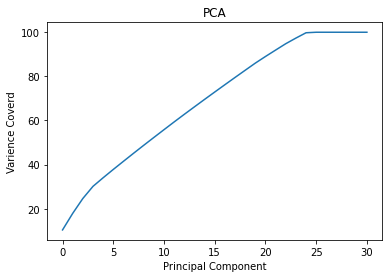

In [40]:
test_pca = pca.fit(df_train_feature_scaled)
plt.figure()
var_cummn = np.cumsum(test_pca.explained_variance_ratio_)*100
k  = np.argmax(var_cummn>95)
print("The number of component which explaning 95% of varience :", k)
plt.plot(var_cummn)
plt.xlabel("Principal Component")
plt.ylabel("Varience Coverd")
plt.title("PCA")
plt.show()

In [41]:
#build pca modal
pca = PCA(n_components=23)
feature_df = pca.fit(df_train_feature_scaled)
feature_df

PCA(n_components=23)

In [42]:
#final feature
feature = pca.transform(df_train_feature_scaled)

In [43]:
feature.shape

(8523, 23)

# best random state

In [44]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Let's find the best random state

def random_state(reg):
    max_r2 = 0
    max_state = 0
    for i in range(1,301):
        x_train,x_test,y_train,y_test = train_test_split(feature,df_train_target, test_size = 0.25, random_state = i)
        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)
        r2_Score = r2_score(y_test, y_pred)
        if r2_Score>max_r2:
            max_r2 = r2_Score
            max_state = i
    print("Best R2_Score corresponding to ",max_state, "is ",max_r2)

#  LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
random_state(lr)

Best R2_Score corresponding to  297 is  0.605461283769074


# Build Modal 

In [46]:
def Modal(function):
    x_train,x_test,y_train,y_test = train_test_split(feature,df_train_target,train_size=0.75,random_state=297)
    function.fit(x_train,y_train)
    y_pre = function.predict(x_test)
    print("Score of test data is :",r2_score(y_test,y_pre))
    print("Mean absolute error is :",mean_absolute_error(y_test,y_pre))
    print("Mean squared error is :",mean_squared_error(y_test,y_pre))
    
def Cross_value_score(function):
    score = cross_val_score(function,feature,df_train_feature,cv=5,scoring='r2')
    print("Cross value score is :",score.mean())
    

    
    

In [47]:
Modal(lr)
Cross_value_score(lr)

Score of test data is : 0.605461283769074
Mean absolute error is : 9.248551361887744
Mean squared error is : 140.51050464779811
Cross value score is : 0.9473450176232234


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor()
Modal(rand_forest)
#Cross_value_score(rand_forest)

Score of test data is : 0.6572887938673959
Mean absolute error is : 8.553123896741264
Mean squared error is : 122.05272268884917


In [49]:
score = cross_val_score(rand_forest,feature,df_train_target,cv=2,scoring='r2').mean()

In [50]:
score

0.6093410782510894

# Dession Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
d_tree = DecisionTreeRegressor()
Modal(d_tree)

Score of test data is : 0.3671294138041199
Mean absolute error is : 11.640631568417092
Mean squared error is : 225.3897064720072


In [52]:
Cross_value_score(d_tree)

Cross value score is : 0.34078414573182175


# Knn Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
Modal(knn_reg)
Cross_value_score(knn_reg)

Score of test data is : 0.5961214812014022
Mean absolute error is : 9.327543781090913
Mean squared error is : 143.8367697723753
Cross value score is : 0.9791390126773111


# AddaBoost Regression

In [54]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost_reg = AdaBoostRegressor()
Modal(ada_boost_reg)
Cross_value_score(ada_boost_reg)

Score of test data is : 0.5543988921636277
Mean absolute error is : 10.264110049434437
Mean squared error is : 158.69579830299747
Cross value score is : nan


# Gradient Boosting Regression

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
grand_boost_reg = GradientBoostingRegressor()
Modal(grand_boost_reg)
Cross_value_score(grand_boost_reg)

Score of test data is : 0.6847148356047257
Mean absolute error is : 8.148993860034432
Mean squared error is : 112.28524789748242
Cross value score is : nan


# XGB Regression

In [56]:
from xgboost import XGBRegressor
xgb_reg= XGBRegressor()
Modal(xgb_reg)

Score of test data is : 0.6377838643896679
Mean absolute error is : 8.729834703180815
Mean squared error is : 128.99918287459977


# SVM Regression

In [57]:
from sklearn.svm import SVR
svr_reg = SVR()
Modal(svr_reg)
Cross_value_score(svr_reg)

Score of test data is : 0.6338398002544505
Mean absolute error is : 8.868531641154899
Mean squared error is : 130.40381673993207
Cross value score is : nan


# Gradient Boosting Regression gives good score.

1. final Modal is Gradient boosting regression.


# Hyper perameter tunning

1. Grid search cv

In [63]:
x_train,x_test,y_train,y_test =train_test_split(feature,df_train_target,random_state=257,test_size=0.25)
from sklearn.model_selection import GridSearchCV
GradientBoostingRegressor()
param_grid = {"min_samples_leaf" : [1,2], "min_samples_split": [2,3,4],
             "n_estimators" : [100], "criterion" : ["friedman_mse"]}

In [64]:
grid_cv = GridSearchCV(grand_boost_reg,param_grid=param_grid)

In [65]:
grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100]})

In [66]:
grid_cv.best_params_

{'criterion': 'friedman_mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [67]:
#now again build modal with some parameters 
gradiant_boost_grid_cv = GradientBoostingRegressor(criterion='friedman_mse',min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [68]:
Modal(gradiant_boost_grid_cv)
Cross_value_score(gradiant_boost_grid_cv)

Score of test data is : 0.6849128088884802
Mean absolute error is : 8.145530617912925
Mean squared error is : 112.21474194999807
Cross value score is : nan


# Now test modal 

In [69]:
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Train_Test,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750000,0.086976,107.8622,37.442890,Test,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
8524,8.300000,0.196030,87.3198,34.031482,Test,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8525,14.600000,0.315555,241.7538,59.677827,Test,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
8526,7.315000,0.124050,155.0340,45.276556,Test,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8527,12.792854,0.344383,234.2300,58.428375,Test,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [70]:
df_test_for_chacking = df_test['Item_Outlet_Sales']
df_test= df_test.drop(columns=['Train_Test','Item_Outlet_Sales'])

In [71]:
df_test.shape

(5681, 31)

In [72]:
df_train_feature.shape

(8523, 31)

In [73]:
test_scaled = scelar.fit_transform(df_test)


In [74]:
test_pca = pca.fit(test_scaled)

In [75]:
test_pca=pca.transform(test_scaled)

In [76]:
test_pca

array([[-0.76019703, -0.93899287, -0.22594549, ...,  0.25595025,
         0.95275686, -2.14334167],
       [-0.60260719,  1.76637772, -2.13060386, ...,  1.25970472,
        -0.661177  ,  0.04560893],
       [ 2.01975275, -1.60723353,  1.52003621, ..., -1.8796445 ,
        -2.08279946,  0.28864235],
       ...,
       [-0.69863384, -1.71508608, -1.71103845, ..., -0.07090701,
        -0.91061277,  0.11183424],
       [-0.66261946,  1.78778498, -2.4018774 , ..., -1.37891032,
         0.31532348,  0.72439897],
       [-0.61139672,  2.10907804, -1.80397991, ...,  0.56818987,
        -0.22154365, -0.16613973]])

In [77]:
sell_predict = gradiant_boost_grid_cv.predict(test_pca)
sell_predict

array([62.01055181, 49.55432832, 11.81377037, ..., 29.03609906,
       37.80677532, 41.593205  ])

# Save Modal


In [79]:
import pickle
file_name = 'big_mart_sell.pkl'
pickle.dump(gradiant_boost_grid_cv,open(file_name,'wb'))